In [2]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리

import matplotlib.pyplot as plt # 데이터 시각화
import seaborn as sns

from datetime import datetime, timedelta # 시간 데이터 처리

In [102]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission_1002.csv")

In [103]:
test['Time'] = pd.to_datetime(test['Time']) 
test = test.set_index('Time')
test.head()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
2017-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2017-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
2017-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
2017-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN


In [28]:
columns = list(test.columns[: 10])

### 1시간 변화량

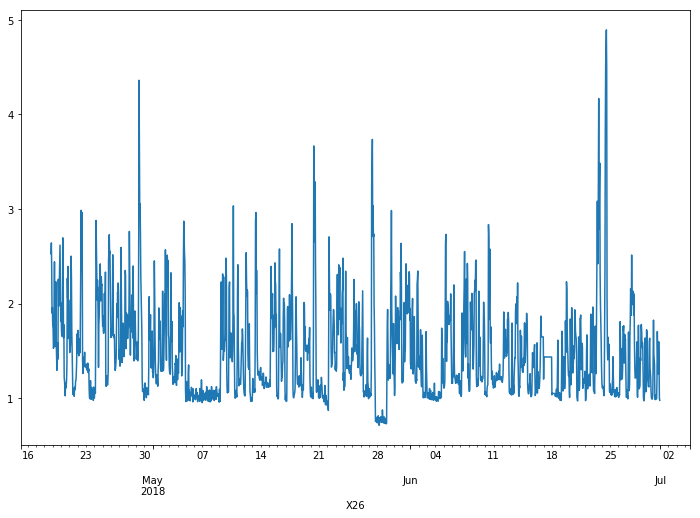

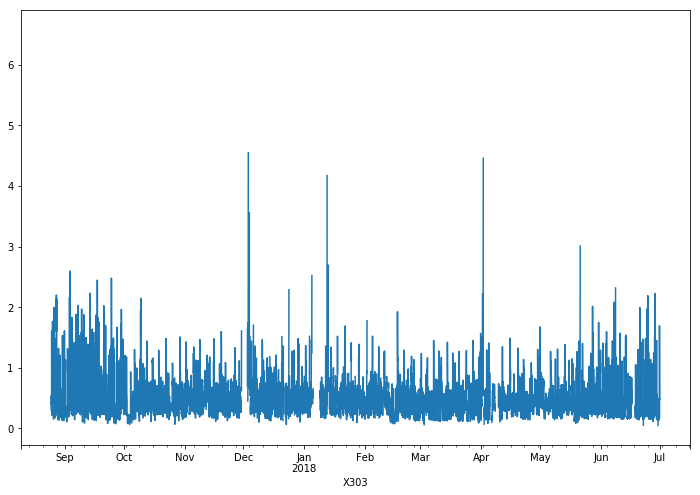

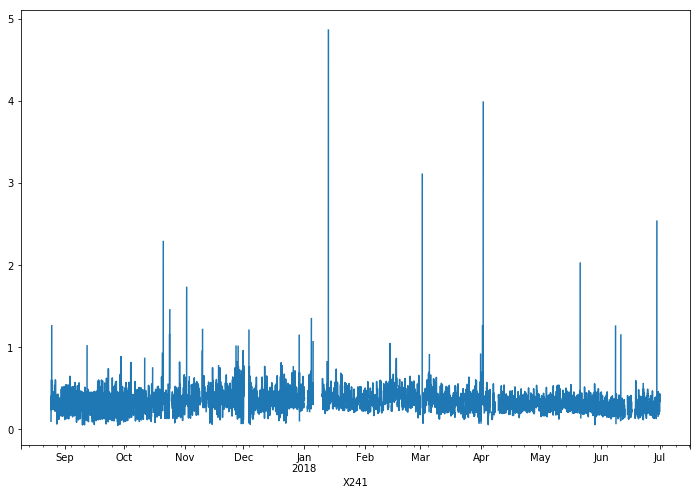

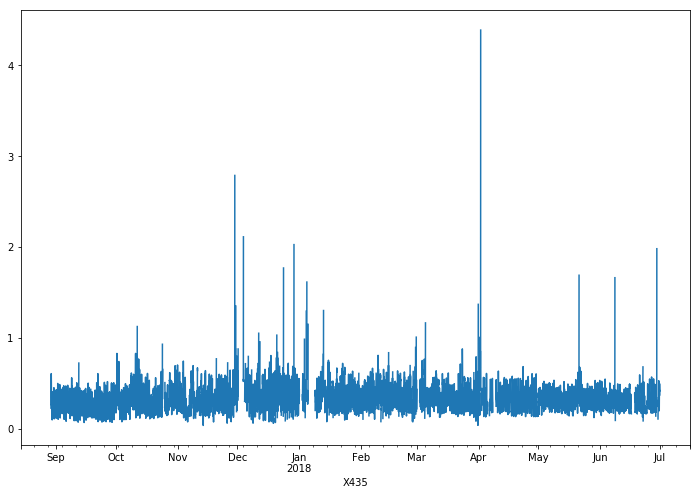

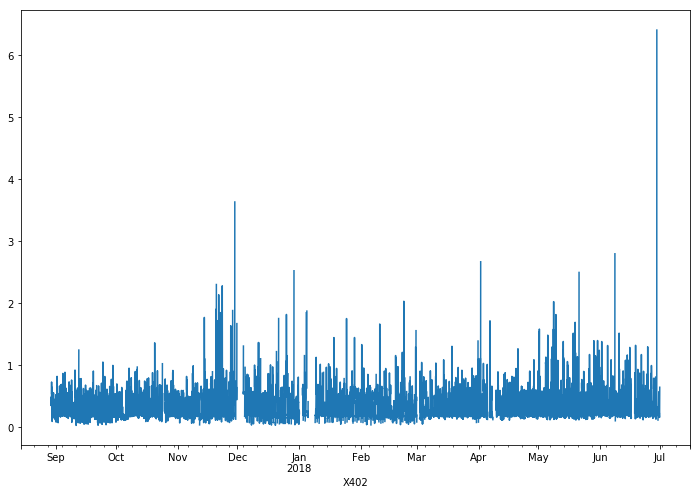

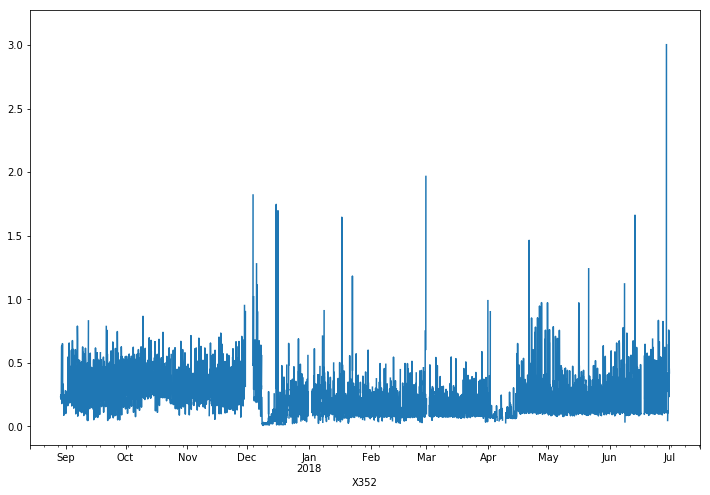

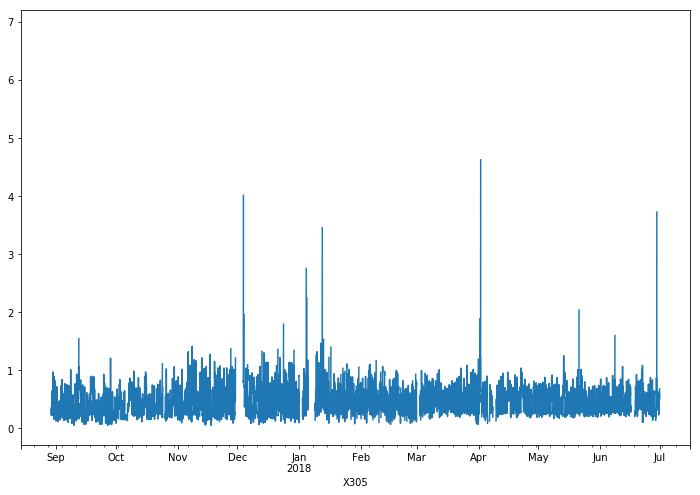

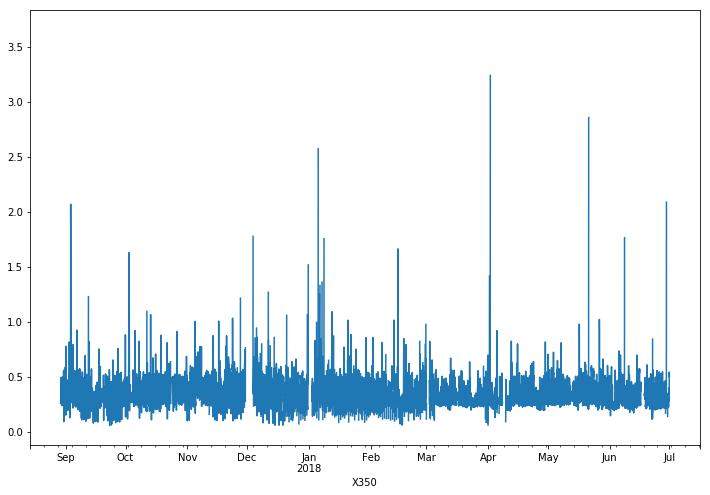

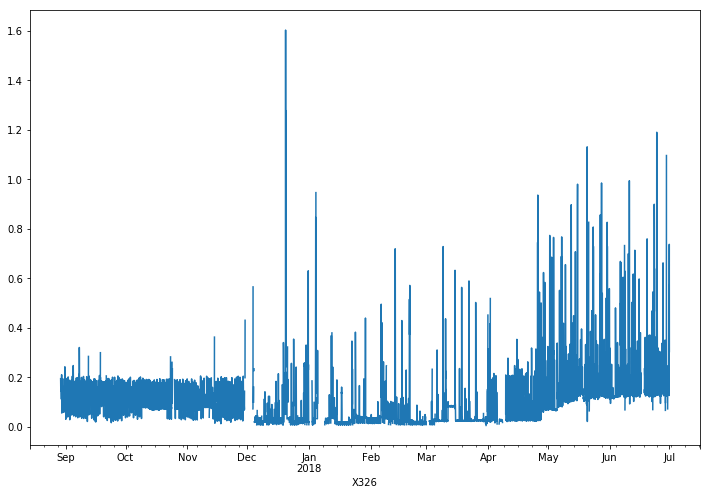

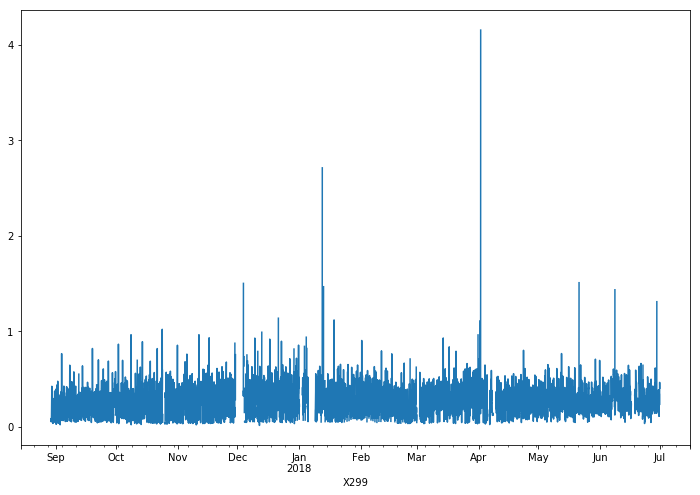

In [32]:
for col in columns:
    test[col].plot(figsize=(12, 8))
    plt.xlabel(col)
    plt.show()

### 1일 변화랑

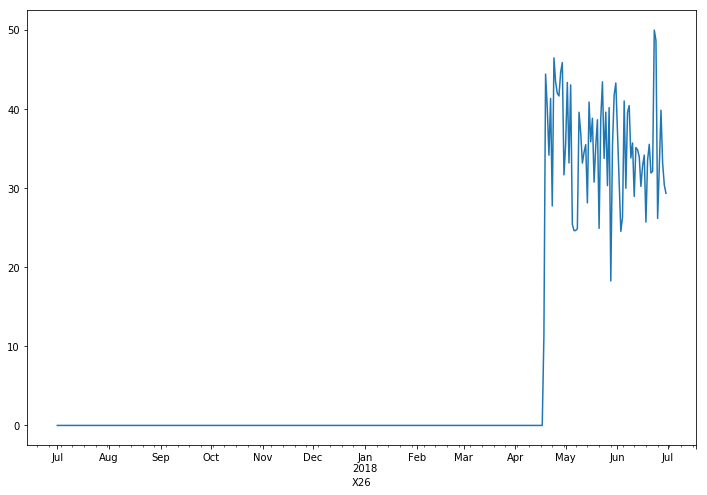

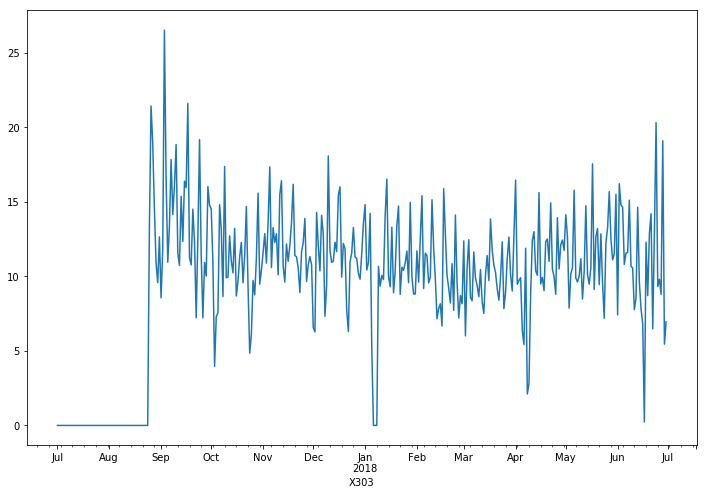

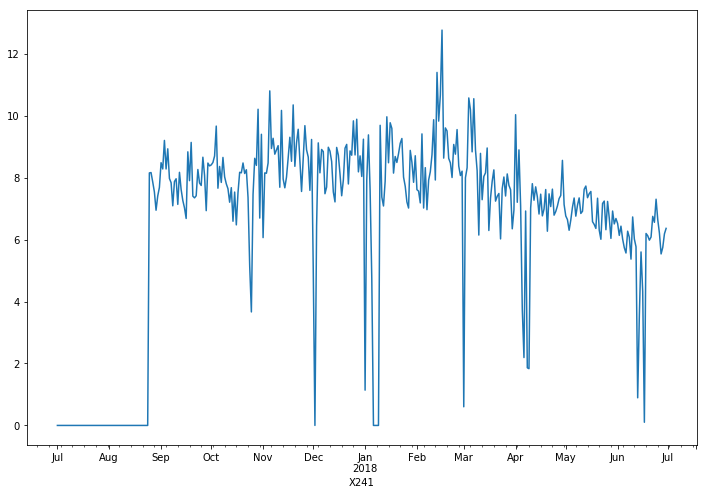

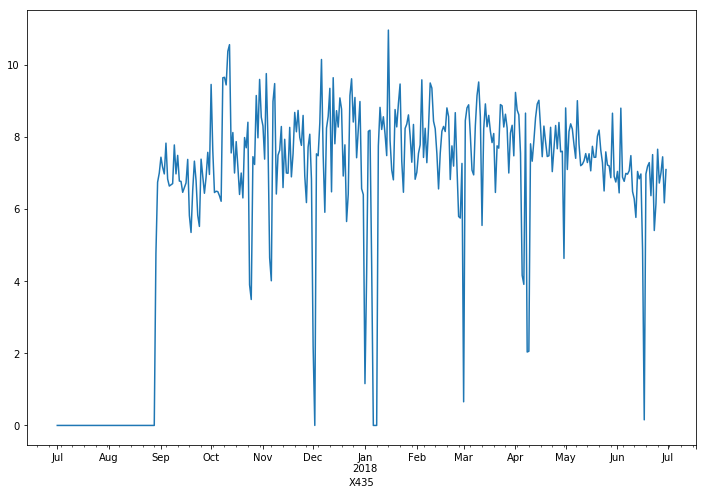

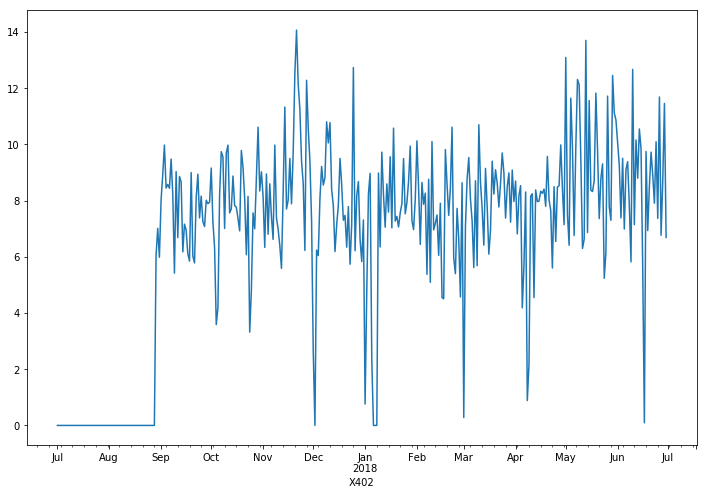

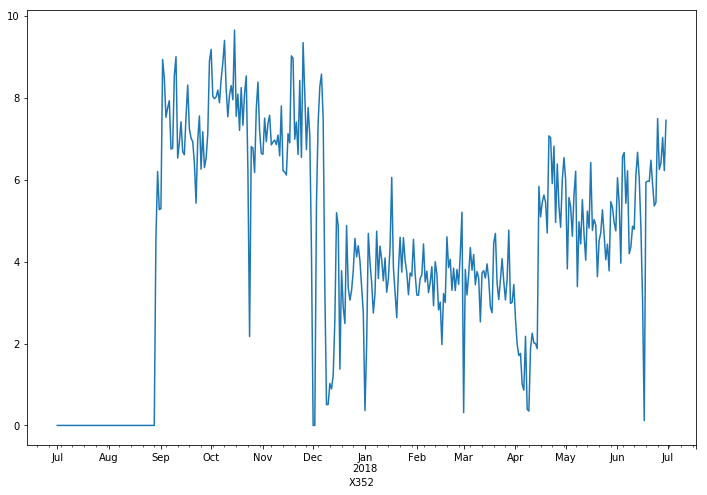

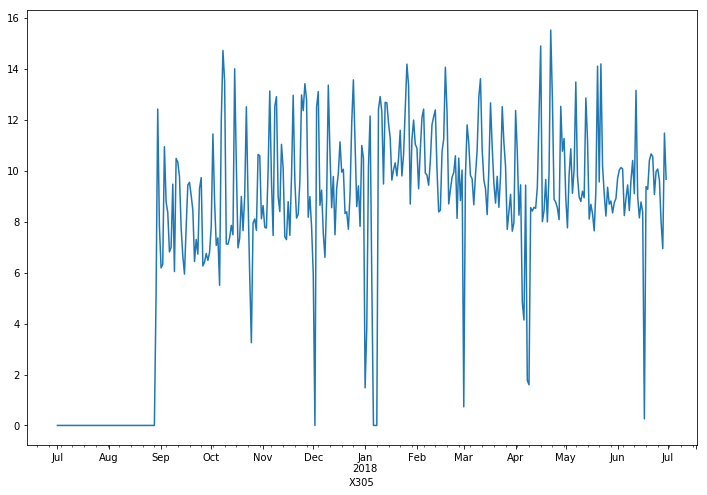

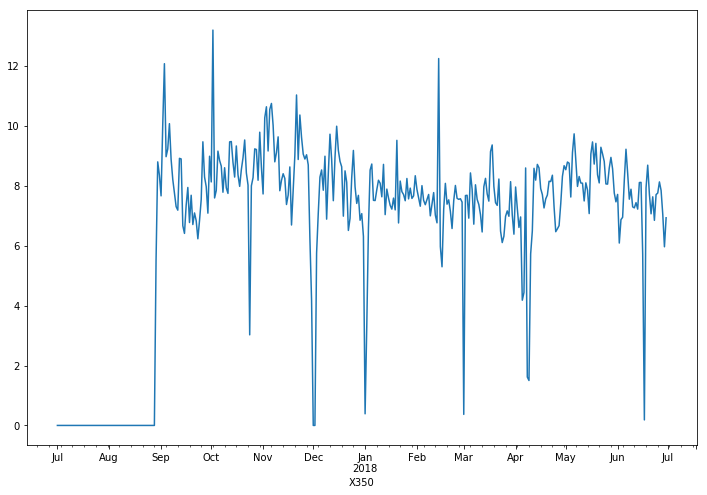

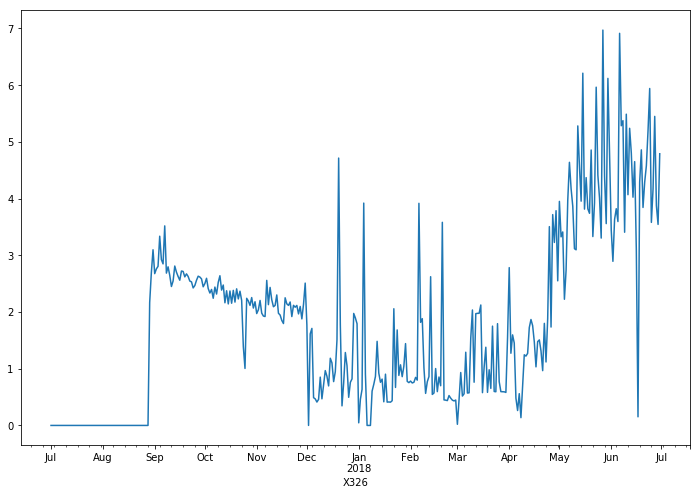

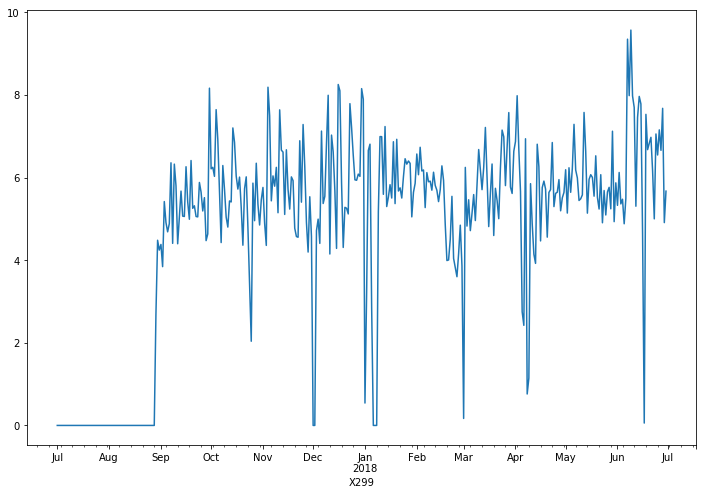

In [34]:
for col in columns:
    test[col].resample('D').sum().plot(figsize=(12, 8))
    plt.xlabel(col)
    plt.show()

In [129]:
# test.loc[test.loc[:, 'X303'].isnull() == False]['X303']
test = test_cp.copy()
test_cp = test.copy()

def fill_nan(df):
    for col in df['place_id'].unique():
        start_dt = df.loc[df.loc[:, col].isnull() == False].index[0]
        from_dt = start_dt
        from_val = df.loc[start_dt, col]

        for dt, val in df.loc[start_dt:, col].items():
            if not pd.isna(val):
                # processing
                length = len(df.loc[from_dt: dt, col]) - 1
                if length != 0:
                    for i in df.loc[from_dt: dt, col].index:
                        df.loc[i, col] = from_val / length

                from_dt = dt
                from_val = val
    return df

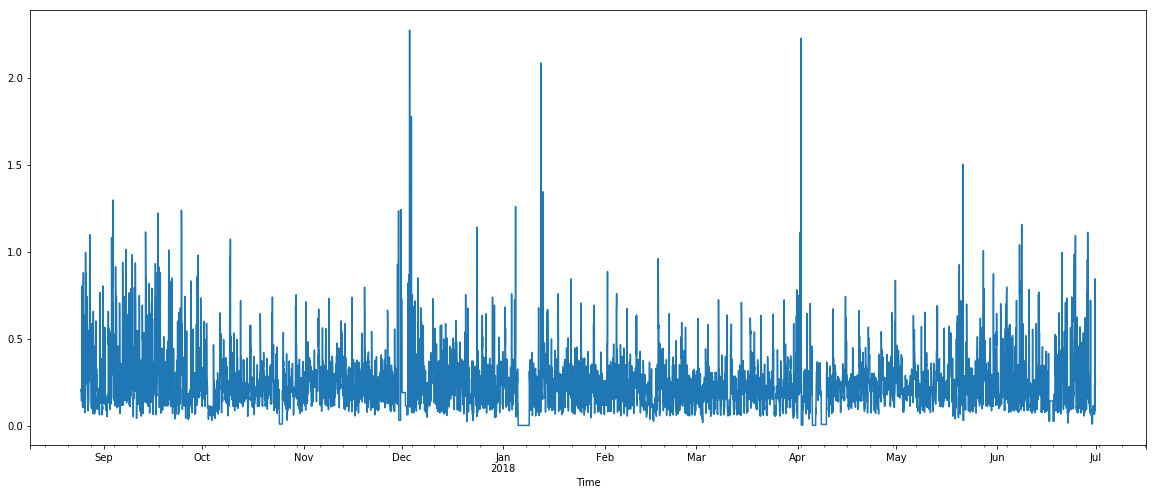

In [119]:
test['X303'].plot(figsize=(20, 8))

In [120]:
test.describe()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
count,1757.000000,7440.000000,6866.000000,6752.000000,6757.000000,6857.000000,6739.000000,6834.000000,6723.000000,6743.000000,...,6872.000000,7062.000000,6831.000000,6671.000000,1757.000000,6763.000000,6748.000000,8760.000000,8760.000000,6651.000000
mean,1.472014,0.237521,0.339697,0.333051,0.357780,0.226552,0.424325,0.347813,0.096840,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,1.356384,0.410571,0.374754
std,0.501135,0.164630,0.170168,0.159685,0.262369,0.163054,0.259619,0.161057,0.105429,0.165962,...,0.131057,0.146844,0.184072,0.214725,0.673083,0.169633,0.183557,1.915454,0.845600,0.185928
min,0.712000,0.003675,0.047000,0.038000,0.030000,0.006000,0.051000,0.058000,0.005000,0.015000,...,0.018000,0.004000,0.029000,0.020000,0.088000,0.008000,0.011000,0.113000,0.004000,0.042000
25%,1.098000,0.130000,0.260000,0.245000,0.185000,0.107000,0.276000,0.255000,0.029000,0.152000,...,0.151000,0.091000,0.235000,0.176000,0.091000,0.163000,0.137000,0.231000,0.028000,0.263000
50%,1.337000,0.206000,0.321000,0.312000,0.271000,0.200000,0.367000,0.311000,0.080000,0.239000,...,0.201000,0.175000,0.302000,0.283000,0.092000,0.251000,0.195000,1.102000,0.062000,0.345000
75%,1.723000,0.297000,0.395000,0.392000,0.479000,0.290000,0.518000,0.421000,0.123000,0.329000,...,0.286250,0.328000,0.414500,0.422500,0.267000,0.326000,0.283000,1.352250,0.225000,0.454000
max,4.895000,2.275000,4.864000,4.387000,6.410000,3.118000,6.861000,3.650000,1.603000,4.156000,...,3.081000,3.729000,3.956000,5.920000,11.991000,3.571000,4.284000,18.862000,5.859000,6.102000


In [128]:
dt = test_cp[test_cp['X303'] == test_cp['X303'].max()].index[0]

test.loc['2017-11-29 22:00:00': dt, 'X303']

Time
2017-11-29 22:00:00    0.696750
2017-11-29 23:00:00    0.621000
2017-11-30 00:00:00    0.536667
2017-11-30 01:00:00    0.536667
2017-11-30 02:00:00    0.536667
2017-11-30 03:00:00    0.353214
2017-11-30 04:00:00    0.353214
2017-11-30 05:00:00    0.353214
2017-11-30 06:00:00    0.353214
2017-11-30 07:00:00    0.353214
2017-11-30 08:00:00    0.353214
2017-11-30 09:00:00    0.353214
2017-11-30 10:00:00    0.353214
2017-11-30 11:00:00    0.353214
2017-11-30 12:00:00    0.353214
2017-11-30 13:00:00    0.353214
2017-11-30 14:00:00    0.353214
2017-11-30 15:00:00    0.353214
2017-11-30 16:00:00    0.353214
2017-11-30 17:00:00    0.247500
2017-11-30 18:00:00    0.247500
2017-11-30 19:00:00    0.466375
2017-11-30 20:00:00    0.466375
2017-11-30 21:00:00    0.466375
2017-11-30 22:00:00    0.466375
2017-11-30 23:00:00    0.466375
2017-12-01 00:00:00    0.466375
2017-12-01 01:00:00    0.466375
2017-12-01 02:00:00    0.466375
2017-12-01 03:00:00    0.262880
Name: X303, dtype: float64

In [126]:
test_cp.loc['2017-11-29 22:00:00': dt, 'X303']

Time
2017-11-29 22:00:00      NaN
2017-11-29 23:00:00    0.621
2017-11-30 00:00:00    1.610
2017-11-30 01:00:00      NaN
2017-11-30 02:00:00      NaN
2017-11-30 03:00:00    4.945
2017-11-30 04:00:00      NaN
2017-11-30 05:00:00      NaN
2017-11-30 06:00:00      NaN
2017-11-30 07:00:00      NaN
2017-11-30 08:00:00      NaN
2017-11-30 09:00:00      NaN
2017-11-30 10:00:00      NaN
2017-11-30 11:00:00      NaN
2017-11-30 12:00:00      NaN
2017-11-30 13:00:00      NaN
2017-11-30 14:00:00      NaN
2017-11-30 15:00:00      NaN
2017-11-30 16:00:00      NaN
2017-11-30 17:00:00    0.495
2017-11-30 18:00:00      NaN
2017-11-30 19:00:00    3.731
2017-11-30 20:00:00      NaN
2017-11-30 21:00:00      NaN
2017-11-30 22:00:00      NaN
2017-11-30 23:00:00      NaN
2017-12-01 00:00:00      NaN
2017-12-01 01:00:00      NaN
2017-12-01 02:00:00      NaN
2017-12-01 03:00:00    6.572
Name: X303, dtype: float64

In [130]:
test = test_cp.copy()
test_cp = test.copy()

fill_nan(test)

AttributeError: 'DataFrame' object has no attribute 'unique'